## 建立数据集

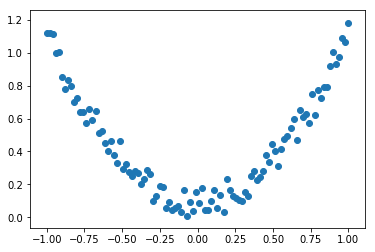

In [125]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F

# 生成100个元素的tensor，元素值为属于-1到1的随机值
data = torch.linspace(-1,1,100)  # shape:100 一维张量

x = data.view(100,1)  # shape:100x1 二维张量
y = x.pow(2) + 0.2 * torch.rand(x.shape)  # y=x平方 + 噪声:0-1

# 画图显示
plt.scatter(x.numpy(), y.numpy())
plt.show()

## 建立神经网络

In [130]:
class Regression(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

## 训练模型

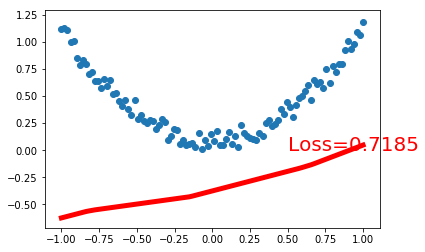

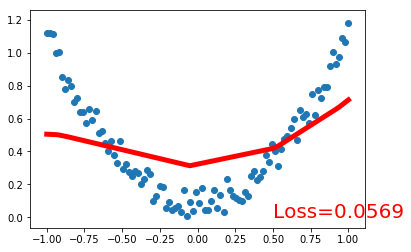

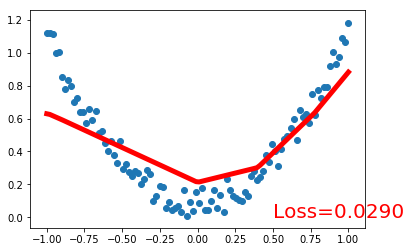

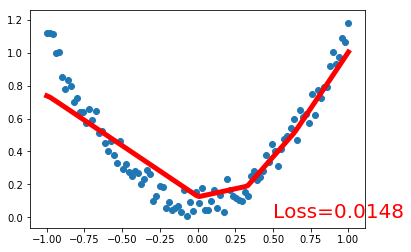

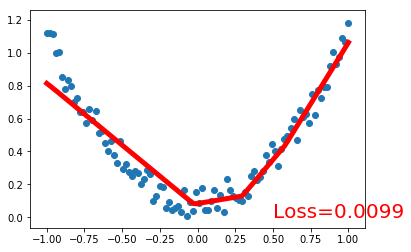

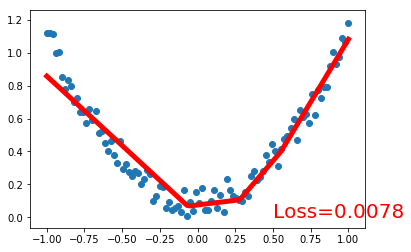

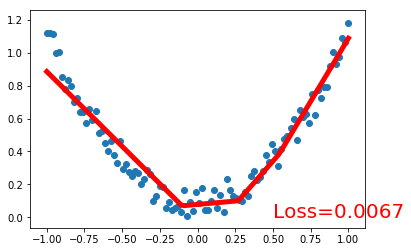

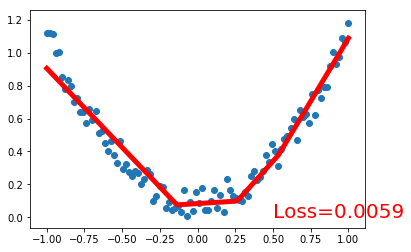

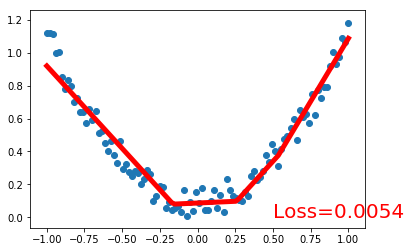

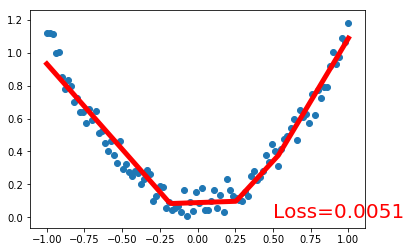

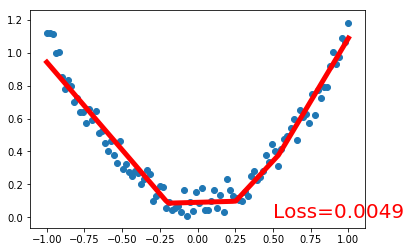

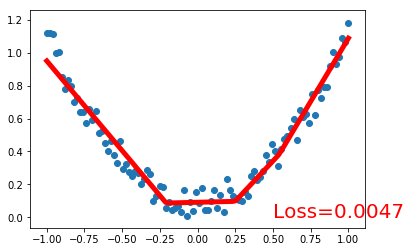

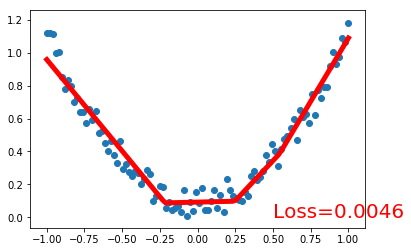

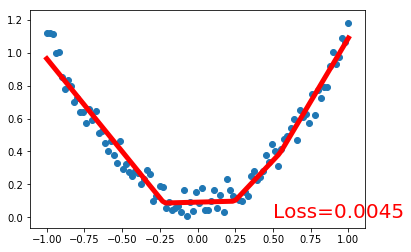

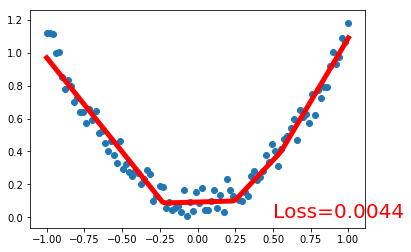

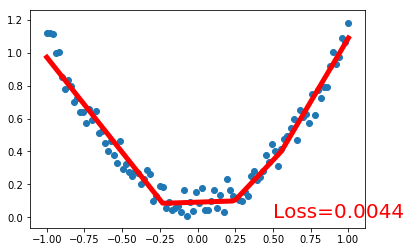

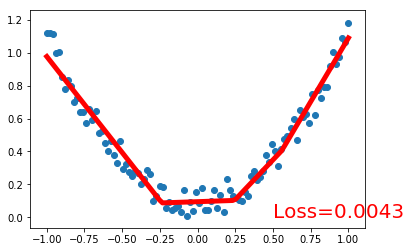

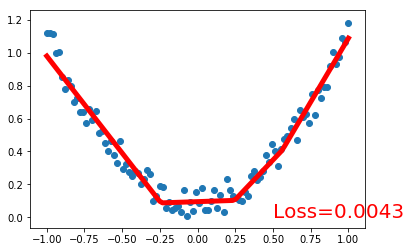

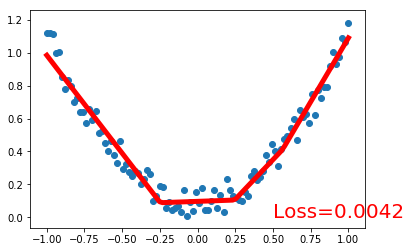

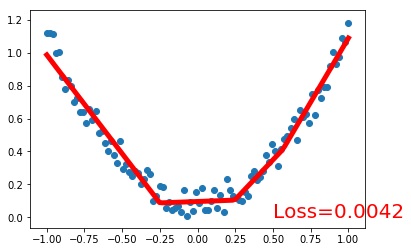

In [133]:
regression = Regression(1,10,1)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(regression.parameters(), lr=0.2)

for i in range(500):
    
    # 清空梯度
    optimizer.zero_grad()
    # 前向传播
    pred = regression(x)
    # 计算损失函数并反向传播
    loss = loss_function(pred, y)
    loss.backward()
    # 根据梯度更新梯度
    optimizer.step()
    
    if i % 25==0:
        plt.cla()
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),pred.detach().numpy(),'r-',lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)